# Linear Regression (OLS) Implemented using `statsmodels`

Notebook Contents
* [EDA](#scrollTo=j0S-JlW6Igz1)
* [Data Processing](#scrollTo=rggRpBu6Pfgs)
* [Outlier Analysis](#scrollTo=GMPXFkEu8jLh)
* [Model Fitting](#scrollTo=8yKCsbr1H5c7)
* [OLS Model Output](#scrollTo=FQeAix8rhS3A)
* [Model Output Interpretation](#scrollTo=8F6CscUeh8te)
* [OLS Model Assumptions](#scrollTo=2-nGQ_qA6jVE)
* [Assumption Diagnostics](#scrollTo=dP-XWOxF-lSY)
* [Model Evaluation & Cross Validation](#scrollTo=TcWKEbFoe9JB)
* [Model Comparison](#scrollTo=GGqc4DDRl2SS)
* [Categorical Feature](#scrollTo=OfTavk17--BT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Connect to Google Drive Locally

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_path = '/content/drive/MyDrive/Colab/Machine Learning/statsmodels/data/Uber-ETA/train.csv'
test_path = '/content/drive/MyDrive/Colab/Machine Learning/statsmodels/data/Uber-ETA/test.csv'
weather_path = '/content/drive/MyDrive/Colab/Machine Learning/statsmodels/data/Uber-ETA/weather.csv'

In [5]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_weather = pd.read_csv(weather_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [7]:
df.head()

ID             Timestamp  Origin_lat  Origin_lon  Destination_lat  \
0  000FLWA8  2019-12-04T20:01:50Z       3.258      36.777            3.003   
1  000RGOAM  2019-12-10T22:37:09Z       3.087      36.707            3.081   
2  001QSGIH  2019-11-23T20:36:10Z       3.144      36.739            3.088   
3  002ACV6R  2019-12-01T05:43:21Z       3.239      36.784            3.054   
4  0039Y7A8  2019-12-17T20:30:20Z       2.912      36.707            3.207   

   Destination_lon  Trip_distance   ETA  
0           36.718          39627  2784  
1           36.727           3918   576  
2           36.742           7265   526  
3           36.763          23350  3130  
4           36.698          36613  2138

In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


In [9]:
df_weather.head()

date  dewpoint_2m_temperature  maximum_2m_air_temperature  \
0  2019-11-01               290.630524                  296.434662   
1  2019-11-02               289.135284                  298.432404   
2  2019-11-03               287.667694                  296.612122   
3  2019-11-04               287.634644                  297.173737   
4  2019-11-05               286.413788                  294.284851   

   mean_2m_air_temperature  mean_sea_level_pressure  \
0               294.125061            101853.617188   
1               295.551666            101225.164062   
2               295.182831            100806.617188   
3               294.368134            101240.929688   
4               292.496979            101131.750000   

   minimum_2m_air_temperature  surface_pressure  total_precipitation  \
0                  292.503998     100806.351562             0.004297   
1                  293.337921     100187.250000             0.001767   
2                  293.674316      99771.414062             0.000797   
3                  292.376221     100200.843750             0.000393   
4                  289.143066     100088.500000             0.004658   

   u_component_of_wind_10m  v_component_of_wind_10m  
0                 3.561323                 0.941695  
1                 5.318593                 3.258237  
2                 8.447649                 3.172982  
3                 5.991428                 2.236700  
4                 6.962730                 2.655364

# EDA

In [10]:
# perc = np.arange(0.05, 1, 0.05)
df['Trip_distance'].describe()

count    83924.000000
mean     13527.821410
std       9296.716006
min          1.000000
25%       6108.000000
50%      11731.500000
75%      19369.000000
max      62028.000000
Name: Trip_distance, dtype: float64

Text(37.722222222222214, 0.5, 'Trip Distance')

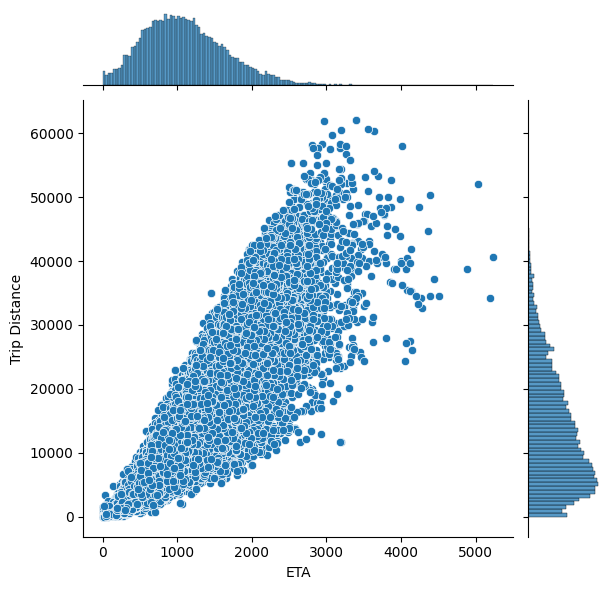

In [11]:
sns.jointplot(data=df, x="ETA", y="Trip_distance")
# plt.title('Joint Plot: ETA & Trip Distance')
plt.xlabel('ETA')
plt.ylabel('Trip Distance')

# Data Preprocessing

In [12]:
# create time features df_train
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date
df['date'] = pd.to_datetime(df['date']).dt.normalize()
df['dayofweek'] = df['Timestamp'].dt.day_name()
df['hour'] = df['Timestamp'].dt.hour

# # create time features df_test
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['date'] = pd.to_datetime(df_weather['date']).dt.normalize()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               83924 non-null  object             
 1   Timestamp        83924 non-null  datetime64[ns, UTC]
 2   Origin_lat       83924 non-null  float64            
 3   Origin_lon       83924 non-null  float64            
 4   Destination_lat  83924 non-null  float64            
 5   Destination_lon  83924 non-null  float64            
 6   Trip_distance    83924 non-null  int64              
 7   ETA              83924 non-null  int64              
 8   date             83924 non-null  datetime64[ns]     
 9   dayofweek        83924 non-null  object             
 10  hour             83924 non-null  int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 6.7+ MB


In [14]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61 non-null     datetime64[ns]
 1   dewpoint_2m_temperature     61 non-null     float64       
 2   maximum_2m_air_temperature  61 non-null     float64       
 3   mean_2m_air_temperature     61 non-null     float64       
 4   mean_sea_level_pressure     61 non-null     float64       
 5   minimum_2m_air_temperature  61 non-null     float64       
 6   surface_pressure            61 non-null     float64       
 7   total_precipitation         61 non-null     float64       
 8   u_component_of_wind_10m     61 non-null     float64       
 9   v_component_of_wind_10m     61 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.9 KB


In [15]:
# join weather data
df = df.merge(df_weather, on='date', how='left')

In [16]:
cols = [
       'Origin_lat', 'Origin_lon', 'Destination_lat',
       'Destination_lon', 'Trip_distance', 'dayofweek',
       'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'mean_sea_level_pressure',
       'minimum_2m_air_temperature', 'surface_pressure', 'total_precipitation',
       'u_component_of_wind_10m', 'v_component_of_wind_10m', 'ETA'
       ]

df_uber = df[cols]

df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Origin_lat                  83924 non-null  float64
 1   Origin_lon                  83924 non-null  float64
 2   Destination_lat             83924 non-null  float64
 3   Destination_lon             83924 non-null  float64
 4   Trip_distance               83924 non-null  int64  
 5   dayofweek                   83924 non-null  object 
 6   dewpoint_2m_temperature     83924 non-null  float64
 7   maximum_2m_air_temperature  83924 non-null  float64
 8   mean_2m_air_temperature     83924 non-null  float64
 9   mean_sea_level_pressure     83924 non-null  float64
 10  minimum_2m_air_temperature  83924 non-null  float64
 11  surface_pressure            83924 non-null  float64
 12  total_precipitation         83924 non-null  float64
 13  u_component_of_wind_10m     839

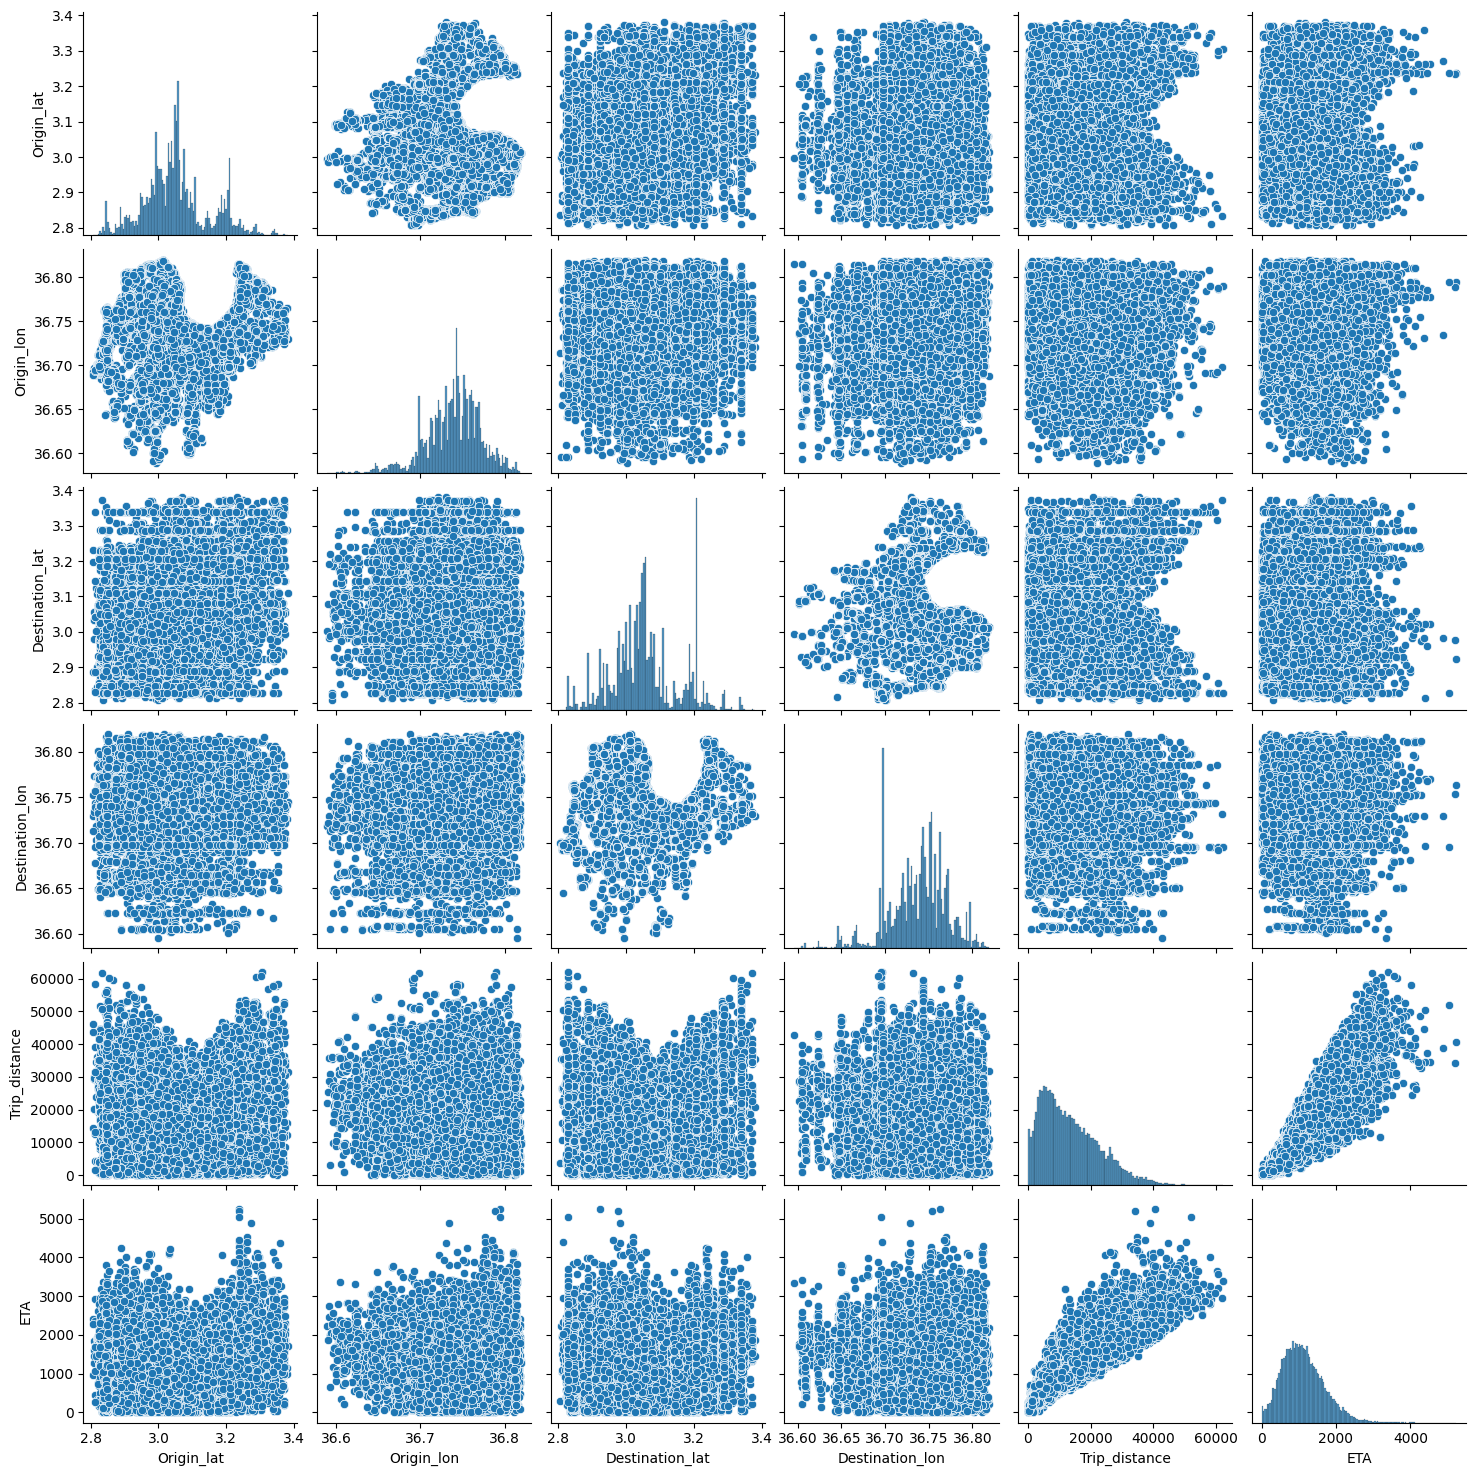

In [17]:
cols = ['Origin_lat', 'Origin_lon', 'Destination_lat', 'Destination_lon', 'Trip_distance', 'ETA']
sns.pairplot(df_uber[cols])

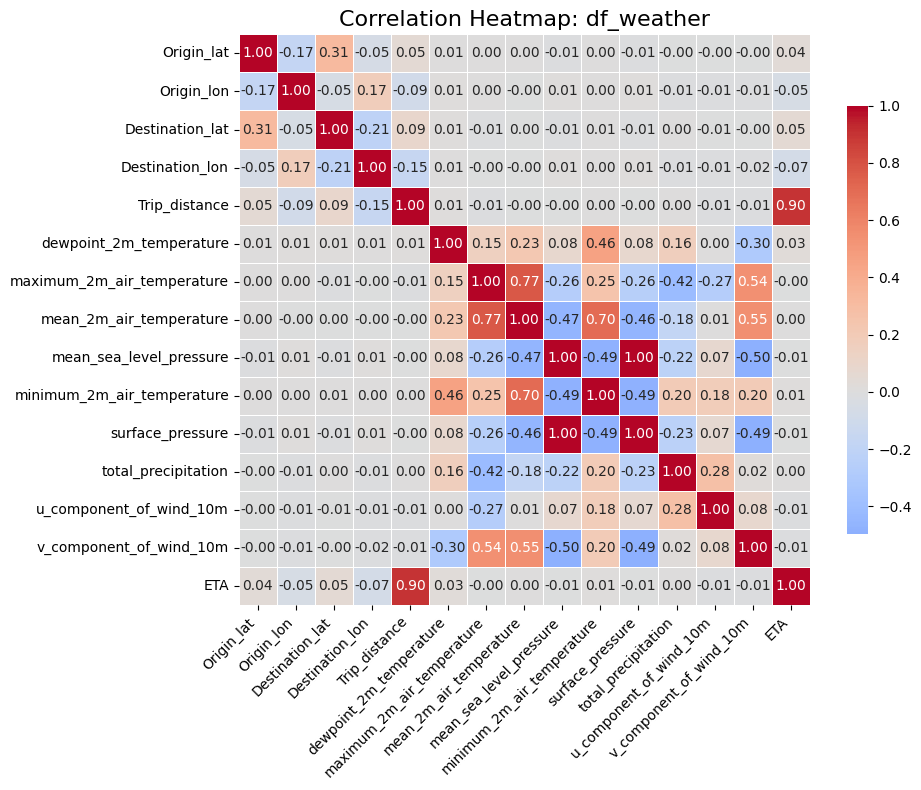

In [18]:
# correlation matrix
corr_matrix = df_uber.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation coefficients
    cmap='coolwarm',  # Color map
    center=0,         # Center the colormap at zero
    fmt=".2f",        # Format the numbers to 2 decimal places
    square=True,      # Make cells square
    linewidths=0.5,   # Cell border lines
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)
plt.title("Correlation Heatmap: df_weather", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-444951493.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_uber[feature], y=df[target], palette="Blues")


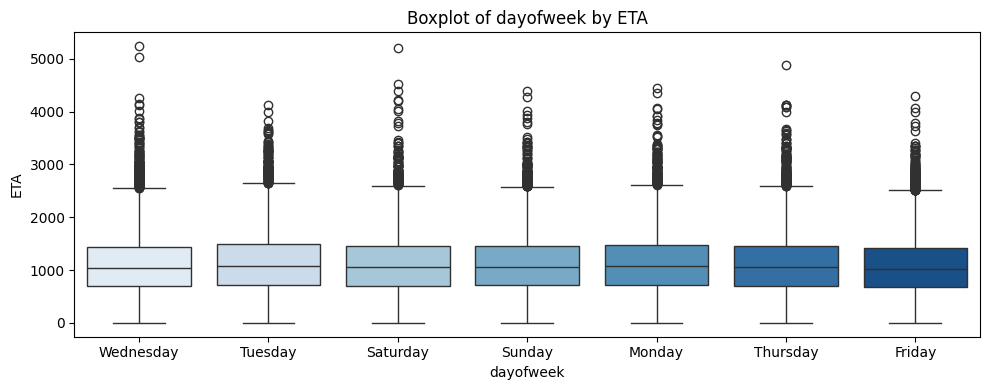

In [19]:
# EDA of categorical variable and target

feature = 'dayofweek'
target = 'ETA'

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_uber[feature], y=df[target], palette="Blues")
plt.title(f"Boxplot of {feature} by {target}")
plt.xlabel(feature)
plt.ylabel(target)
plt.tight_layout()
plt.show()

# Outlier Analysis

In [20]:
# identify outliers using IQR method
def flag_outliers_iqr(df, column):
    """
    Adds a binary flag column to the dataframe indicating outliers using the IQR method.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        column (str): The name of the column to evaluate.

    Returns:
        pd.DataFrame: The dataframe with a new binary outlier column added.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_col = f'{column}_outlier_flag'
    df[outlier_col] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)

    return df

In [21]:
# Trip_distance outliers
df_uber_outlier = flag_outliers_iqr(df_uber, 'Trip_distance')
df_uber_outlier[['Trip_distance', 'Trip_distance_outlier_flag']]

df_uber_outlier['Trip_distance_outlier_flag'].value_counts()

/tmp/ipython-input-2049287231.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[outlier_col] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)


Trip_distance_outlier_flag
0    82975
1      949
Name: count, dtype: int64

# Linear Regression

In [22]:
model_cols = [
 'Origin_lat',
 'Origin_lon',
 'Destination_lat',
 'Destination_lon',
 'Trip_distance'
 ]

x = df_uber[model_cols]
y = df_uber['ETA']

In [23]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()    #fit will apply a specific estimate technique (here,OLS) to obtain the fit of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ETA   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 7.228e+04
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:29:36   Log-Likelihood:            -5.8065e+05
No. Observations:               83924   AIC:                         1.161e+06
Df Residuals:                   83918   BIC:                         1.161e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.051e+04   1295.784    -38.984      0.000   -5.31e+04    -4.8e+04
Origin_lat         39.0194      9.362      4.168      0.000      20.669      57.369
Origin_lon        425.9026     27.181     15.669      0.000     372.628     479.178
Destination_lat  -140.9327      9.048    -15.577      0.000    -158.666    -123.200
Destination_lon   967.4913     26.981     35.858      0.000     914.609    1020.374
Trip_distance       0.0552   9.23e-05    598.054      0.000       0.055       0.055
==============================================================================
Omnibus:                    23508.186   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98896.232
Skew:                           1.329   Prob(JB):                         0.00
Kurtosis:                       7.606   Cond. No.                     2.52e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

# OLS Model Output

| Output Element         | Description                                                                 | Interpretation Notes                                              | Access in `statsmodels`              |
|------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------|--------------------------------------|
| `Dep. Variable`        | The target variable being predicted                                          | —                                                                | `model.model.endog_names`           |
| `Model`                | The type of model used (`OLS`)                                              | Ordinary Least Squares regression                               | `type(model.model).__name__`        |
| `Method`               | Estimation method used (e.g., Least Squares)                                | —                                                                | `"Least Squares"` (fixed for OLS)   |
| `No. Observations`     | Total number of data points used                                            | Should match expected row count                                 | `model.nobs`                         |
| `Df Residuals`         | Degrees of freedom: $n - p$                                                 | Residual degrees of freedom                                     | `model.df_resid`                    |
| `Df Model`             | Number of estimated predictors                                               | Excludes intercept                                               | `model.df_model`                    |
| `Covariance Type`      | Type of standard error estimation                                           | Default is `nonrobust`; others include `HC0`, `HC1`, etc.       | `model.cov_type`                    |
| `R-squared`            | Proportion of variance in `y` explained by the model                        | Example: `0.85` → model explains 85% of variation                | `model.rsquared`                    |
| `Adj. R-squared`       | Adjusted R² accounts for number of predictors                               | Penalizes for overfitting                                        | `model.rsquared_adj`               |
| `F-statistic`          | Overall model significance: tests if all $\beta_i = 0$                      | Large value → likely at least one predictor is useful           | `model.fvalue`                      |
| `Prob (F-statistic)`   | p-value for the F-test                                                      | Example: `0.000` → reject null (model is significant)           | `model.f_pvalue`                   |
| `Log-Likelihood`       | Log of the model likelihood                                                 | Higher is better                                                 | `model.llf`                         |
| `AIC`                  | Akaike Information Criterion                                                | Lower = better for model selection                              | `model.aic`                         |
| `BIC`                  | Bayesian Information Criterion                                              | More conservative than AIC                                      | `model.bic`                         |
| `coef`                 | Estimated regression coefficient $\hat{\\beta}$                             | Direction + effect size of predictor                            | `model.params`                      |
| `std err`              | Standard error of the coefficient                                           | Precision of estimate                                           | `model.bse`                         |
| `t`                    | t-statistic                                                                 | Coef ÷ std err                                                  | `model.tvalues`                     |
| `P>|t|`                | p-value for coefficient significance                                        | Example: `<0.05` → significant predictor                        | `model.pvalues`                     |
| `[0.025, 0.975]`       | 95% confidence interval for the coefficient                                 | If 0 not in range → significant effect                          | `model.conf_int()`                  |
| `Omnibus`              | Omnibus test for residual normality                                         | Large value = non-normal residuals                              | `from scipy.stats import normaltest; normaltest(model.resid)` |
| `Prob(Omnibus)`        | p-value for Omnibus test                                                    | `< 0.05` → reject normality                                     | Same as above: index `[1]` of result |
| `Skew`, `Kurtosis`     | Shape of residual distribution                                              | Skew ≠ 0 or Kurtosis ≠ 3 → not normal                           | `from scipy.stats import skew, kurtosis; skew(model.resid), kurtosis(model.resid)` |
| `Durbin-Watson`        | Test for autocorrelation in residuals (0–4)                                | ≈2 = no autocorrelation                                         | `from statsmodels.stats.stattools import durbin_watson; durbin_watson(model.resid)` |
| `Jarque-Bera (JB)`     | JB test for normality of residuals                                          | High = non-normal residuals                                    | `from scipy.stats import jarque_bera; jarque_bera(model.resid)[0]` |
| `Prob(JB)`             | p-value for JB test                                                         | `< 0.05` → reject normality                                     | `jarque_bera(model.resid)[1]`       |
| `Cond. No.`            | Condition number (multicollinearity diagnostic)                            | >30 → possible multicollinearity                                | `np.linalg.cond(model.model.exog)` |

---

# Model Output Interpretation

* F-statistic tests the null hypothesis that all regression coefficients are equal to zero, meaning there is no relationship between the independent variables and the dependent variable in the population.

* F-statitistc P-value of 0.00 indicates that at least one predictor coefficient is non-zero (statistically)

* P-value of 'Trip_distance' of 0.00 is statistically significance

* Omnibus p-value of 0.000 indicates that the residuals are not normally distributed (OLS assumes residuals are normally distributed)

* Skew = 1.34, Kurtosis = 7.75; indicates the distribution of the residuals have right skew. Indicates target should be transformed using Box-Cox transformation

* Jarque-Bera test evaluates whether the residuals are normally distributed, value of 104066.054 and Prob(JB) of 0.00 indicates you can confidently reject the null hypothesis. The residuals are not normally distributed.
  * Indicates target variable should be transformed
  * It means standard errors, p-values, and confidence intervals may be invalid under the current model

* Durbin-Watson test of 2 indicates that there no autocorrelation of residuals

---

# OLS Assumptions

1. Linearity
2. Independence of Errors
3. Homoscedasticity (Constant Variance of Errors)
4. Normality of Errors
5. No Multicollinearity of Predictors

---

✅ 1. Linearity
The relationship between predictors and the target is linear in parameters.

🔍 How to Assess:
* Residual plots: Should show no clear pattern (i.e., residuals centered around 0)
* Partial regression plots: `from statsmodels.graphics.plot_partregress()`
* Scatterplots between each predictor and the target (EDA)

🔧 What to Do if Violated:
* Try transforming predictors (e.g., log, square root)
* Add polynomial terms or interactions
* Use non-linear models (e.g., decision trees or GAMs)

---

✅ 2. Independence of Errors
Residuals should be independent of each other (especially in time series).

🔍 How to Assess:
* Durbin-Watson test (≈2 is ideal)
* Residual vs. Time plots (look for autocorrelation)

🔧 What to Do if Violated:
* Use time-series models (e.g., ARIMA, GLS)
* Include lagged variables or autocorrelation terms
* Use robust standard errors if dependence is mild

---

✅ 3. Homoscedasticity (Constant Variance of Errors)
The spread of residuals should be roughly constant across all levels of the predictors.

🔍 How to Assess:
* Residuals vs. Fitted plot: Should not show a funnel shape
* Breusch-Pagan test or White test for heteroscedasticity

🔧 What to Do if Violated:
* Use log transformation of y or predictors
* Use Weighted Least Squares (WLS)
* Use robust standard errors (HC0, HC1, etc.)
---

✅ 4. Normality of Errors
Residuals should be normally distributed, mainly for valid hypothesis testing.

🔍 How to Assess:
* Q-Q Plot (statsmodels.api.qqplot)
* Histogram/KDE of residuals
* Jarque-Bera or Omnibus test

🔧 What to Do if Violated:
* Transform the target variable (e.g., log or Box-Cox)
* Trim or Winsorize outliers
* Use robust regression (RLM in statsmodels)
---

✅ 5. No Multicollinearity
Predictors should not be highly correlated with each other.

🔍 How to Assess:
* Correlation matrix
* Variance Inflation Factor (VIF) (> 5 or 10 is problematic)

🔧 What to Do if Violated:
* Remove or combine correlated predictors
* Use PCA or regularized regression (e.g., Ridge, Lasso)
* Use domain knowledge to drop redundant variables

# Assumption Diagnostics

## 1. Linearity

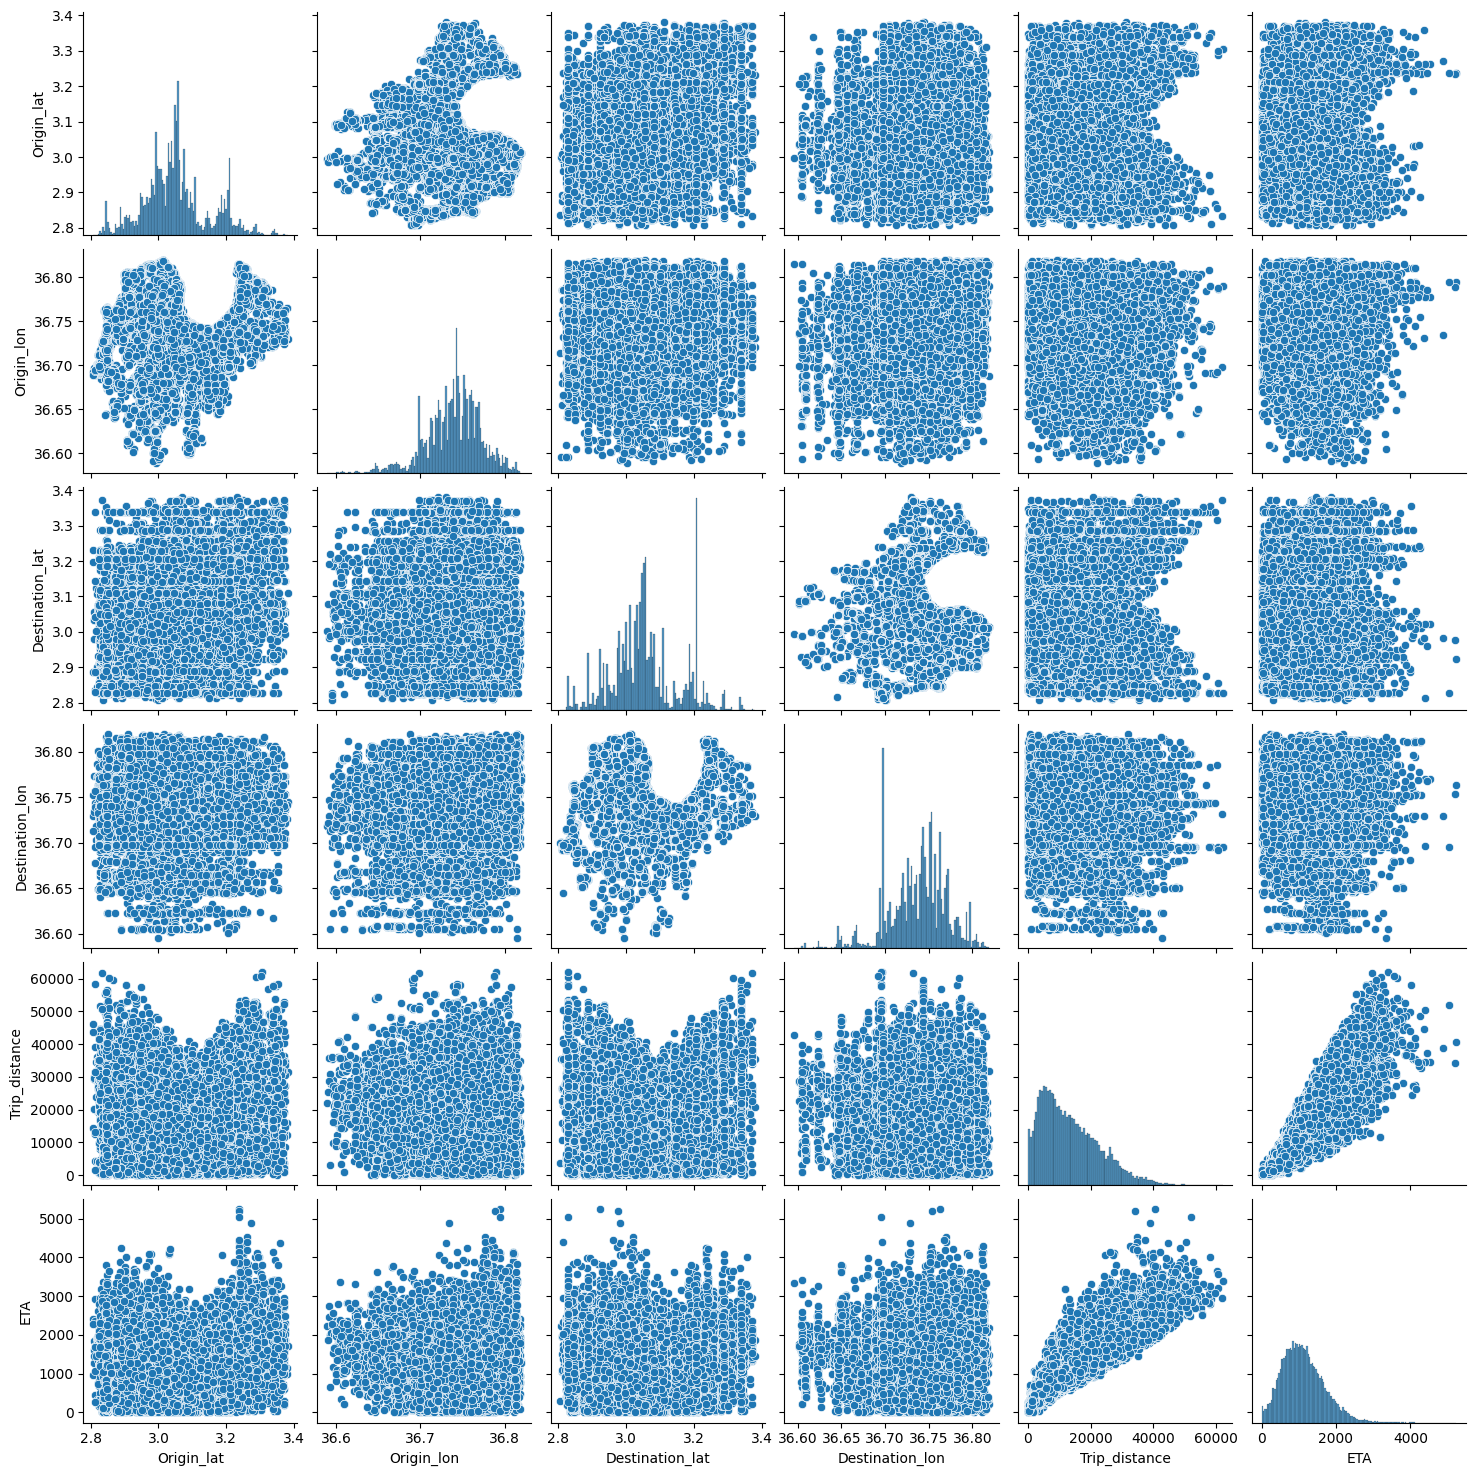

In [24]:
cols = ['Origin_lat', 'Origin_lon', 'Destination_lat', 'Destination_lon', 'Trip_distance', 'ETA']
sns.pairplot(df_uber[cols])

## 2. Independence of Errors Residuals
What to look for:

* DW ≈ 2 → ✅
* DW < 2 → Positive autocorrelation
* DW > 2 → Negative autocorrelation

In [25]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw_stat:.3f}")

Durbin-Watson: 2.001


**Interpretation:** Based on durbin-watson test statistic of 2.001, indicates errors are independent

## 3. Constant Variance of Errors
🔍 How to Assess:

* Residuals vs. Fitted plot: Should not show a funnel shape
* Breusch-Pagan test or White test for heteroscedasticity

What to look for:

* Residuals evenly spread → ✅
* Funnel shape of residual vs fitted plot or BP p-value < 0.05 → ❌

In [ ]:
# Residuals vs. Fitted Plot
fitted_vals = model.fittedvalues
residuals = model.resid

sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

In [ ]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")

**Interpretation:** Based of funnel shape of residual vs fitted values plot, indicates the residuals do not have constant variance

## 4. Normality of Errors

What to look for:
* Q-Q plot ≈ straight line → ✅
* p-value of JB test < 0.05 → ❌ residuals not normal

🔧 What to Do if Violated:
* Transform the target variable (e.g., log or Box-Cox)
* Trim or Winsorize outliers
* Use robust regression (RLM in statsmodels)

In [ ]:
# Q-Q Plot
sm.qqplot(model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
# Jarque-Bera Test
from scipy.stats import jarque_bera
jb_stat, jb_pval = jarque_bera(model.resid)
print(f"Jarque-Bera p-value: {jb_pval:.4f}")

**Interpretation:** QQ plot and JB test p-value of 0.000 indicate that the residuals are not normally distributed

## 5. No Multicollinearity

What to look for:
* VIF < 5 (or 10) → ✅
* VIF > 10 → ❌ serious multicollinearity

🔧 What to Do if Violated:
* Remove or combine correlated predictors
* Use PCA or regularized regression (e.g., Ridge, Lasso)
* Use domain knowledge to drop redundant variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add constant if needed
X_with_const = sm.add_constant(x)

# Calculate VIF for each predictor
vif_df = pd.DataFrame()
vif_df["Variable"] = X_with_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                 for i in range(X_with_const.shape[1])]
print(vif_df)

**Interpretation:** VIF are all small, therefore there are no signs of multicollinearity

---

### Check for Influential Points Using Cook’s Distance

✅ Interpretation
* Points above 4 / n are considered influential.
* You don’t have to drop them — but inspect them individually.
* Useful alongside:
  * Leverage values (influence.hat_matrix_diag)
  * Studentized residuals (influence.resid_studentized_external)

In [ ]:
# Get influence measures
influence = model.get_influence()
cooks_d, p_values = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(10, 5))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(4 / len(x), color='red', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

### Optional: View High-Influence Points

In [ ]:
threshold = 4 / len(x)
influential_points = pd.Series(cooks_d).sort_values(ascending=False)
print("Most influential points (Cook's D > 4/n):")
print(influential_points[influential_points > threshold])

---

# Diagnostic Wrapper Function

In [ ]:
def ols_diagnostics(model: sm.regression.linear_model.RegressionResultsWrapper, X, y):
    """
    Displays key diagnostic plots and statistics for OLS assumptions:
    1. Linearity
    2. Independence of Errors
    3. Homoscedasticity
    4. Normality of Residuals
    5. Multicollinearity
    6. Influential Outliers via Cook's Distance
    """

    residuals = model.resid
    fitted_vals = model.fittedvalues

    # 1. Linearity and Homoscedasticity - Residuals vs Fitted Plot
    plt.figure(figsize=(8, 4))
    sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.axhline(0, linestyle='--', color='black')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Fitted")
    # Interpretation: Look for random scatter. Curved shape → non-linearity. Funnel shape → heteroscedasticity.
    plt.show()

    # 2. Independence of Errors - Durbin-Watson Test
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson: {dw_stat:.4f}")
    # Interpretation: DW ≈ 2 → residuals are independent. DW < 2 → positive autocorrelation. DW > 2 → negative autocorrelation.

    # 3. Homoscedasticity - Breusch-Pagan Test
    bp_test = het_breuschpagan(residuals, model.model.exog)
    print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")
    # Interpretation: p < 0.05 → heteroscedasticity likely present.

    # 4. Normality of Residuals
    fig = sm.qqplot(residuals, line='45', fit=True)
    plt.title("Q-Q Plot of Residuals")
    # Interpretation: Points should fall roughly on the 45-degree line if residuals are normal.
    plt.show()

    jb_stat, jb_pval = jarque_bera(residuals)
    print(f"Jarque-Bera p-value: {jb_pval:.4f}")
    # Interpretation: p < 0.05 → residuals are not normally distributed.

    # print(f"Skewness: {skew(residuals):.4f}")
    # print(f"Kurtosis: {kurtosis(residuals):.4f}")
    # # Interpretation: Skew ≠ 0 or Kurtosis ≠ 3 suggests non-normality.

    # 5. Multicollinearity - Variance Inflation Factor (VIF)
    if isinstance(X, pd.DataFrame):
        X_vals = sm.add_constant(X)
        vif_df = pd.DataFrame()
        vif_df["Variable"] = X_vals.columns
        vif_df["VIF"] = [variance_inflation_factor(X_vals.values, i) for i in range(X_vals.shape[1])]
        print("\nVIF Table:")
        print(vif_df)
        # Interpretation: VIF > 5 or 10 indicates high multicollinearity.

    # 6. Outliers/Influential Points - Cook's Distance
    influence = model.get_influence()
    cooks_d, _ = influence.cooks_distance
    threshold = 4 / len(X)

    plt.figure(figsize=(10, 4))
    plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
    plt.axhline(threshold, color='red', linestyle='--', label='Threshold = 4/n')
    plt.xlabel('Observation Index')
    plt.ylabel("Cook's Distance")
    plt.title("Cook's Distance Plot")
    plt.legend()
    # Interpretation: Points above the threshold line are potentially influential and should be reviewed.
    plt.show()

    influential = pd.Series(cooks_d).sort_values(ascending=False)
    high_influence = influential[influential > threshold]
    if not high_influence.empty:
        print("High influence observations (Cook's D > 4/n):")
        print(high_influence)

In [ ]:
# ols_diagnostics(model, x, y)

---

# Model Evaluation & Cross Validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

def cross_validate_ols(X: pd.DataFrame, y: pd.Series, k: int = 5, random_state: int = 42):
    """
    Perform k-fold cross-validation using statsmodels OLS and report MSE, RMSE, and R² scores.

    Parameters:
        X (pd.DataFrame): Feature matrix (excluding constant).
        y (pd.Series): Target variable.
        k (int): Number of folds.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Dictionary with lists and mean of MSE, RMSE, and R² scores.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Add constant for intercept
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        # Fit model
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_test_const)

        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    results = {
        "MSEs": mse_scores,
        "RMSEs": rmse_scores,
        "R2s": r2_scores,
        "Mean MSE": np.mean(mse_scores),
        "Mean RMSE": np.mean(rmse_scores),
        "Mean R2": np.mean(r2_scores)
    }

    return results

In [ ]:
cross_validate_ols(x, y)

# Regression Model Comparison

In [ ]:
model.summary()

In [ ]:
x_subset = x[['Origin_lat', 'Destination_lon', 'Trip_distance']]
model_subset = sm.OLS(y, sm.add_constant(x_subset)).fit() # Nested model
model_subset.summary()

---

✅ 1. Compare AIC and BIC (Works for any models)
* Lower values are better (penalizes complexity)
* Use for non-nested and nested models alike

✅ 2. Compare Adjusted R²
* Checks model explanatory power with complexity accounted for
* Higher Adj. R² = better

✅ 3. Likelihood Ratio Test (Only for nested models)
* p < 0.05 → full model is significantly better
* Use this only if model_subset is nested in model

✅ 4. F-test (Another option for nested models)
* Same logic as LRT: tests whether extra variables in full model improve fit


In [ ]:
def compare_ols_models(model, model_subset, X_full, X_subset, y):
    """
    Compare two OLS models: a full model and a subset model.
    Prints AIC, BIC, Adj. R^2, LRT, F-test, and cross-validated RMSE and R^2.
    """
    print("=== Model Fit Comparison ===")
    print(f"Full Model AIC: {model.aic:.2f}")
    print(f"Subset Model AIC: {model_subset.aic:.2f}")
    print(f"Full Model BIC: {model.bic:.2f}")
    print(f"Subset Model BIC: {model_subset.bic:.2f}")

    print(f"\nFull Model Adjusted R²: {model.rsquared_adj:.4f}")
    print(f"Subset Model Adjusted R²: {model_subset.rsquared_adj:.4f}")

    # Likelihood Ratio Test
    # "Does adding more predictors significantly improve model fit?"
    # $H_0$: Reduced model is sufficient
    # $H_1$: Full model fits the data significantly
    # p-value < 0.05 → Reject $H_0$: additional predictors significantly improve fit
    try:
        lr_stat, lr_pval, lr_df = model.compare_lr_test(model_subset)
        print("\n=== Likelihood Ratio Test ===")
        print(f"LR Statistic: {lr_stat:.4f}")
        print(f"p-value: {lr_pval:.4f}")
        print(f"DF Difference: {lr_df}")
    except Exception:
        print("\nLikelihood Ratio Test not available (models may not be nested).")

    # F-Test
    # "Does adding more predictors significantly improve model fit?"
    # $H_0$: Reduced model is sufficient
    # $H_1$: Full model fits the data significantly
    # p-value < 0.05 → Reject $H_0$: additional predictors significantly improve fit
    try:
        f_stat, f_pval, f_df = model.compare_f_test(model_subset)
        print("\n=== F-Test ===")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {f_pval:.4f}")
        print(f"DF Difference: {f_df}")
    except Exception:
        print("\nF-Test not available (models may not be nested).")

    # Cross-validation
    print("\n=== Cross-Validation ===")
    cv_full = cross_validate_ols(X_full, y)
    cv_subset = cross_validate_ols(X_subset, y)

    print(f"Full Model Mean RMSE: {cv_full['Mean RMSE']:.4f}")
    print(f"Subset Model Mean RMSE: {cv_subset['Mean RMSE']:.4f}")
    print(f"Full Model Mean R²: {cv_full['Mean R2']:.4f}")
    print(f"Subset Model Mean R²: {cv_subset['Mean R2']:.4f}")

In [ ]:
compare_ols_models(model=model,
                   model_subset=model_subset,
                   X_full=x,
                   X_subset=x_subset,
                   y=y)

# Linear Regression with Categorical Feature

In [ ]:
# model fitting using dayofweek feature
import statsmodels.formula.api as smf

model_cat = smf.ols(formula='ETA ~ Origin_lat + Origin_lon + Destination_lat + Destination_lon + Trip_distance + C(dayofweek)', data=df_uber).fit()
model_cat.summary()

---

# Categorical Feature Interpretation:
* One category must be used as the reference (baseline).
* All other dummy variables are interpreted relative to that baseline.
* In your model, Friday is the omitted category — so all other day coefficients tell you:
  * “How much higher/lower is ETA on this day, compared to Friday?”

# Change Categorical Reference/Baseline

In [43]:
model_cols = [
 'Origin_lat',
 'Origin_lon',
 'Destination_lat',
 'Destination_lon',
 'Trip_distance',
 'dayofweek'
 ]

x_cat = df_uber[model_cols]
y = df_uber['ETA']

# Let's say you want Mondayas the baseline
x_cat['dayofweek'] = pd.Categorical(x_cat['dayofweek'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# The dropped dummy is your reference level. In this case Monday
x_cat = pd.get_dummies(x_cat, columns=['dayofweek'], drop_first=True, dtype=int)

x_cat = sm.add_constant(x_cat)

model = sm.OLS(y, x_cat).fit()
model.summary()

/tmp/ipython-input-2080110330.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat['dayofweek'] = pd.Categorical(x_cat['dayofweek'],


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ETA   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 3.291e+04
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:38:31   Log-Likelihood:            -5.8059e+05
No. Observations:               83924   AIC:                         1.161e+06
Df Residuals:                   83912   BIC:                         1.161e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.063e+04   1295.136    -39.092      0.000   -5.32e+04   -4.81e+04
Origin_lat             39.4900      9.357      4.221      0.000      21.151      57.829
Origin_lon            428.2054     27.167     15.762      0.000     374.959     481.452
Destination_lat      -142.3693      9.043    -15.743      0.000    -160.094    -124.644
Destination_lon       968.7577     26.967     35.924      0.000     915.903    1021.612
Trip_distance           0.0552   9.23e-05    598.286      0.000       0.055       0.055
dayofweek_Tuesday     -12.9105      3.355     -3.848      0.000     -19.487      -6.334
dayofweek_Wednesday   -22.3982      3.188     -7.026      0.000     -28.647     -16.150
dayofweek_Thursday     -4.2848      3.100     -1.382      0.167     -10.361       1.791
dayofweek_Friday      -25.6787      3.260     -7.877      0.000     -32.068     -19.289
dayofweek_Saturday    -20.3918      3.320     -6.143      0.000     -26.898     -13.885
dayofweek_Sunday       -7.4206      3.359     -2.209      0.027     -14.004      -0.837
==============================================================================
Omnibus:                    23459.436   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98761.700
Skew:                           1.326   Prob(JB):                         0.00
Kurtosis:                       7.606   Cond. No.                     2.52e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---